In [ ]:
import numpy as np
import pandas as pd
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
print(len(houses))
print(houses.head())


1220
    price  latitude  longitude  bedrooms  ...  district    city       state   type
1  330000 -8.029595 -34.900372       3.0  ...    Recife  Recife  Pernambuco  apart
2  255000 -8.037247 -34.890986       2.0  ...    Recife  Recife  Pernambuco  apart
3  380000 -8.047562 -34.876964       3.0  ...    Recife  Recife  Pernambuco  apart
4  300000 -8.053580 -34.908733       3.0  ...    Recife  Recife  Pernambuco  apart
5  320000 -8.026516 -34.917791       2.0  ...    Recife  Recife  Pernambuco  apart

[5 rows x 13 columns]


## Removendo registros replicados

In [ ]:
houses[houses.duplicated()].sort_values("latitude").head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
1728,685000,-8.139813,-34.903769,3.0,128.0,1.0,2.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
1250,685000,-8.139813,-34.903769,3.0,128.0,1.0,2.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
1656,685000,-8.139813,-34.903769,3.0,128.0,1.0,2.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
1461,700000,-8.138389,-34.905751,4.0,154.0,2.0,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
532,124900,-8.132903,-34.902119,4.0,90.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart


In [ ]:
len(houses)

1220

In [ ]:
# removendo entradas duplicadas
houses.drop_duplicates(keep = False, inplace = True)
print(len(houses))

548


In [ ]:
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]

In [ ]:
# removendo baseado em um conjunto de atributos
houses.drop_duplicates(subset =['latitude','longitude'], keep = False, inplace = True)
print(len(houses))
print(houses.head())

345
       price  latitude  longitude  bedrooms  ...  district    city       state   type
308    45000 -8.035779 -34.887359       4.0  ...    Recife  Recife  Pernambuco  apart
415  1600000 -8.039761 -34.900415      15.0  ...    Recife  Recife  Pernambuco  apart
499    45000 -8.035371 -34.935030       4.0  ...    Recife  Recife  Pernambuco  apart
502   124900 -8.046449 -34.908543       4.0  ...    Recife  Recife  Pernambuco  apart
903   550000 -8.032964 -34.905096       3.0  ...    Recife  Recife  Pernambuco  apart

[5 rows x 13 columns]


## Removendo outliers utilizando z-score robusto (univariado)




In [ ]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
print(len(houses))

1220


In [ ]:
houses['area'].describe()

count    343.000000
mean     118.851924
std       71.695635
min       25.000000
25%       71.000000
50%       94.000000
75%      146.000000
max      623.000000
Name: area, dtype: float64

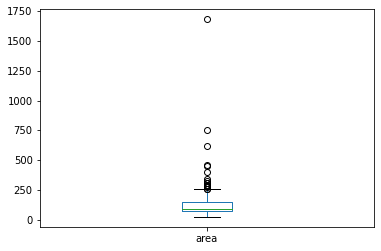

In [ ]:
houses['area'].plot.box()

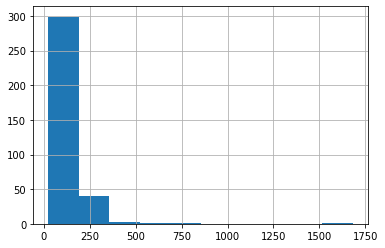

In [ ]:
houses['area'].hist()

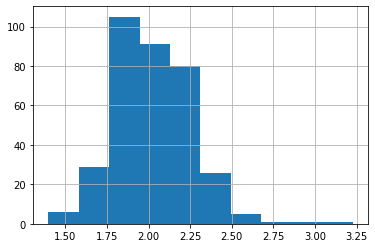

In [ ]:
from numpy import log10
houses['area_log'] = log10(houses['area'])
houses['area_log'].hist()

In [ ]:
from numpy import abs
mad = abs(houses['area_log'] - houses['area_log'].median()).median()*(1/0.6745)
print(mad)

0.23451396552554346


In [ ]:
houses['area_log'].mad()

0.18584607536436853

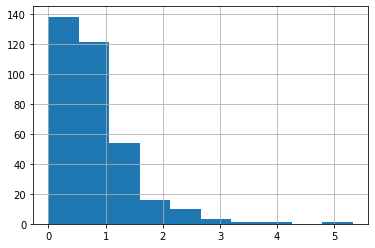

In [ ]:
(abs(houses['area_log']-houses['area_log'].median())/mad).hist()

In [ ]:
houses[abs(houses['area_log']-houses['area_log'].median())/mad > 3.5]


,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,area_log
942,850000,-8.037278,-34.932243,3.0,750.0,5.0,NaN,NaN,Iputinga,Recife,Recife,Pernambuco,house,2.875061
1364,7000000,-8.055745,-34.892368,5.0,1682.0,0.0,4.0,NaN,Soledade,Recife,Recife,Pernambuco,house,3.225826


In [ ]:
houses = houses[abs(houses['area_log']-houses['area_log'].median())/mad < 3.5]
print(len(houses))

343


## Removendo outliers utilizando método de tukey (univariado)

In [ ]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
print(len(houses))

1220


In [ ]:
houses['price'].describe()

count    1.210000e+03
mean     6.468194e+05
std      5.409202e+05
min      4.500000e+04
25%      3.300000e+05
50%      4.700000e+05
75%      7.400000e+05
max      3.900000e+06
Name: price, dtype: float64

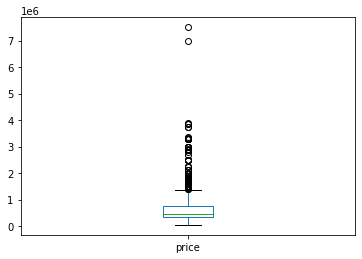

In [ ]:
houses['price'].plot.box()

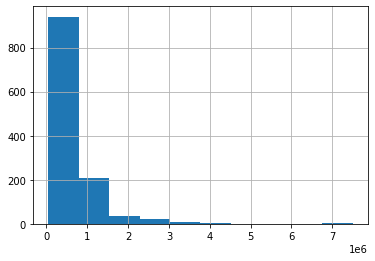

In [ ]:
houses['price'].hist()

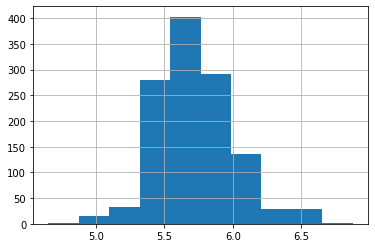

In [ ]:
houses['price_log'] = log10(houses['price'])
houses['price_log'].hist()

In [ ]:
q1 = houses['price_log'].quantile(q=0.25)
q3 = houses['price_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.356547323513813


In [ ]:
houses[houses['price_log'] < (q1-1.5*iqr)]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_log
308,45000,-8.035779,-34.887359,4.0,67.0,3.0,3.0,1.0,Encruzilhada,Recife,Recife,Pernambuco,apart,4.653213
499,45000,-8.035371,-34.935030,4.0,70.0,3.0,NaN,1.0,Iputinga,Recife,Recife,Pernambuco,apart,4.653213
1220,90000,-8.060194,-34.887513,1.0,65.0,1.0,1.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,4.954243


In [ ]:
houses[houses['price_log'] > (q3+1.5*iqr)]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_log
69,3000000,-8.036285,-34.903731,4.0,300.0,4.0,6.0,4.0,Jaqueira,Recife,Recife,Pernambuco,apart,6.477121
115,3300000,-8.039791,-34.896209,4.0,177.0,3.0,3.0,1.0,Aflitos,Recife,Recife,Pernambuco,apart,6.518514
120,2858000,-8.112539,-34.904207,4.0,70.0,NaN,3.0,NaN,Imbiribeira,Recife,Recife,Pernambuco,apart,6.456062
130,3300000,-8.113703,-34.891219,4.0,175.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,6.518514
264,2858000,-8.043143,-34.891382,4.0,62.0,3.0,3.0,1.0,Espinheiro,Recife,Recife,Pernambuco,apart,6.456062
329,3000000,-8.033553,-34.918960,5.0,330.0,4.0,4.0,2.0,Casa Forte,Recife,Recife,Pernambuco,apart,6.477121
343,3840000,-8.033553,-34.918960,5.0,384.0,5.0,7.0,5.0,Casa Forte,Recife,Recife,Pernambuco,apart,6.584331
385,3840000,-8.033553,-34.918960,5.0,384.0,5.0,7.0,5.0,Casa Forte,Recife,Recife,Pernambuco,apart,6.584331
400,2858000,-8.054936,-34.889466,4.0,51.0,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,6.456062
411,3300000,-8.060634,-34.905875,4.0,85.0,NaN,3.0,NaN,Madalena,Recife,Recife,Pernambuco,apart,6.518514


In [ ]:
houses = houses[(houses['price_log'] > (q1-1.5*iqr)) & (houses['price_log'] < (q3+1.5*iqr))]
len(houses)

1187

## Removendo outliers usando razão de duas variáveis (bivariado)

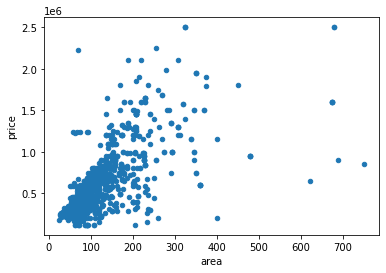

In [ ]:
houses.plot.scatter(x='area',y='price')

In [ ]:
houses['price_m2'] = houses['price'] / houses['area']

In [ ]:
houses['price_m2'].describe()

count     1187.000000
mean      5191.953955
std       2115.041843
min        497.500000
25%       3884.468133
50%       5231.578947
75%       6300.000000
max      31857.142857
Name: price_m2, dtype: float64

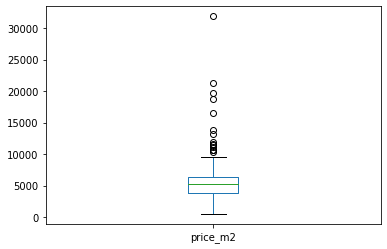

In [ ]:
houses['price_m2'].plot.box()

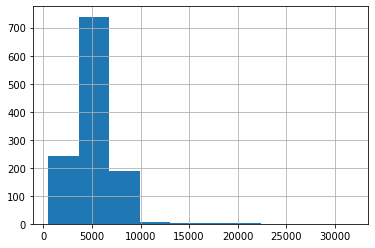

In [ ]:
houses['price_m2'].hist()

In [ ]:
houses['price_m2'] = log10(houses['price_m2'])

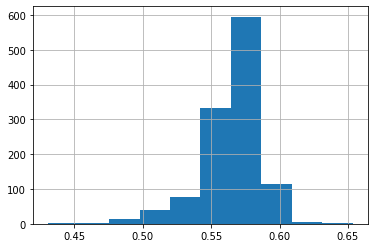

In [ ]:
houses['price_m2'].hist()

In [ ]:
mad = abs(houses['price_m2'] - houses['price_m2'].median()).median()*(1/0.6745)

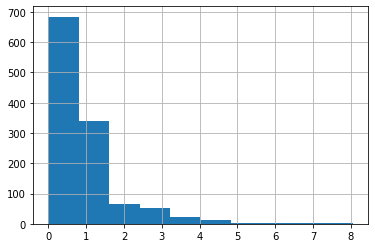

In [ ]:
(abs(houses['price_m2']-houses['price_m2'].median())/mad).hist()

In [ ]:
houses[abs(houses['price_m2']-houses['price_m2'].median())/mad > 3.5]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_log,price_m2
10,1238839,-8.056542,-34.943772,4.0,58.0,3.0,3.0,1.0,Engenho do Meio,Recife,Recife,Pernambuco,apart,6.093015,0.636446
70,124900,-8.126764,-34.903425,4.0,107.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,5.096562,0.486739
76,124900,-8.132903,-34.902119,4.0,90.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,5.096562,0.497250
88,119900,-8.060634,-34.905875,4.0,85.0,NaN,3.0,NaN,Madalena,Recife,Recife,Pernambuco,apart,5.078819,0.498228
92,600000,-8.032509,-34.887935,5.0,360.0,3.0,3.0,1.0,HipÌ_dromo,Recife,Recife,Pernambuco,house,5.778151,0.508105
144,155000,-8.120764,-34.899239,4.0,120.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,5.190332,0.492921
155,124900,-8.120252,-34.895666,4.0,205.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,5.096562,0.444795
192,199000,-8.128495,-34.903834,4.0,120.0,3.0,3.0,1.0,Boa Viagem,Recife,Recife,Pernambuco,apart,5.298853,0.507812
194,338000,-7.969322,-34.971088,4.0,210.0,NaN,3.0,NaN,Pau-Ferro,Recife,Recife,Pernambuco,house,5.528917,0.506058
203,600000,-8.032509,-34.887935,5.0,360.0,3.0,3.0,1.0,HipÌ_dromo,Recife,Recife,Pernambuco,house,5.778151,0.508105


In [ ]:
houses = houses[abs(houses['price_m2']-houses['price_m2'].median())/mad < 3.5]
print(len(houses))

1154


## Removendo outliers  com Elliptic Envelope (multivariado)

In [ ]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses = houses.dropna()
print(houses.head())

    price  latitude  longitude  bedrooms  ...  district    city       state   type
1  330000 -8.029595 -34.900372       3.0  ...    Recife  Recife  Pernambuco  apart
3  380000 -8.047562 -34.876964       3.0  ...    Recife  Recife  Pernambuco  apart
4  300000 -8.053580 -34.908733       3.0  ...    Recife  Recife  Pernambuco  apart
5  320000 -8.026516 -34.917791       2.0  ...    Recife  Recife  Pernambuco  apart
6  750000 -8.047562 -34.876964       4.0  ...    Recife  Recife  Pernambuco  apart

[5 rows x 13 columns]


In [ ]:
houses.dtypes

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
dtype: object

In [ ]:
houses['suburb'] = houses['suburb'].astype('category')
houses['district'] = houses['district'].astype('category')
houses['city'] = houses['city'].astype('category')
houses['state'] = houses['state'].astype('category')
houses['type'] = houses['type'].astype('category')

In [ ]:
houses['suburb'] = houses['suburb'].cat.codes
houses['district'] = houses['district'].cat.codes
houses['city'] = houses['city'].cat.codes
houses['state'] = houses['state'].cat.codes
houses['type'] = houses['type'].cat.codes

In [ ]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,27,0,0,0,0
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,24,0,0,0,0
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,19,0,0,0,0
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,6,0,0,0,0
6,750000,-8.047562,-34.876964,4.0,115.0,2.0,4.0,2.0,24,0,0,0,0


In [ ]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(houses)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
                 store_precision=True, support_fraction=None)

In [ ]:
scores = detector.predict(houses)

In [ ]:
scores

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
houses['outlier'] = scores
print(houses.head())

    price  latitude  longitude  bedrooms  ...  city  state  type  outlier
1  330000 -8.029595 -34.900372       3.0  ...     0      0     0        1
3  380000 -8.047562 -34.876964       3.0  ...     0      0     0        1
4  300000 -8.053580 -34.908733       3.0  ...     0      0     0        1
5  320000 -8.026516 -34.917791       2.0  ...     0      0     0        1
6  750000 -8.047562 -34.876964       4.0  ...     0      0     0        1

[5 rows x 14 columns]


In [ ]:
houses[houses['outlier'] == -1]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,outlier
41,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
52,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
115,3300000,-8.039791,-34.896209,4.0,177.0,3.0,3.0,1.0,0,0,0,0,0,-1
563,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
808,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
826,3357000,-8.056198,-34.899656,4.0,136.0,3.0,3.0,1.0,9,0,0,0,0,-1
1181,3900000,-8.112738,-34.890597,4.0,457.0,3.0,6.0,4.0,4,0,0,0,0,-1


In [ ]:
houses = houses[houses['outlier'] != -1]
len(houses)

627

## Removendo outliers com Isolation Forests (multivariado)

In [ ]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses = houses.dropna()
print(houses.head())

    price  latitude  longitude  bedrooms  ...  district    city       state   type
1  330000 -8.029595 -34.900372       3.0  ...    Recife  Recife  Pernambuco  apart
3  380000 -8.047562 -34.876964       3.0  ...    Recife  Recife  Pernambuco  apart
4  300000 -8.053580 -34.908733       3.0  ...    Recife  Recife  Pernambuco  apart
5  320000 -8.026516 -34.917791       2.0  ...    Recife  Recife  Pernambuco  apart
6  750000 -8.047562 -34.876964       4.0  ...    Recife  Recife  Pernambuco  apart

[5 rows x 13 columns]


In [ ]:
houses['suburb'] = houses['suburb'].astype('category')
houses['district'] = houses['district'].astype('category')
houses['city'] = houses['city'].astype('category')
houses['state'] = houses['state'].astype('category')
houses['type'] = houses['type'].astype('category')

In [ ]:
houses['suburb'] = houses['suburb'].cat.codes
houses['district'] = houses['district'].cat.codes
houses['city'] = houses['city'].cat.codes
houses['state'] = houses['state'].cat.codes
houses['type'] = houses['type'].cat.codes

In [ ]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(houses)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7FB9DCF01BA0, verbose=0,
                warm_start=False)

In [ ]:
scores = clf.predict(houses)

In [ ]:
scores

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
houses['outlier'] = scores
print(houses.head())

    price  latitude  longitude  bedrooms  ...  city  state  type  outlier
1  330000 -8.029595 -34.900372       3.0  ...     0      0     0        1
3  380000 -8.047562 -34.876964       3.0  ...     0      0     0        1
4  300000 -8.053580 -34.908733       3.0  ...     0      0     0        1
5  320000 -8.026516 -34.917791       2.0  ...     0      0     0        1
6  750000 -8.047562 -34.876964       4.0  ...     0      0     0        1

[5 rows x 14 columns]


In [ ]:
houses[houses['outlier'] == -1]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,outlier
10,1238839,-8.056542,-34.943772,4.0,58.0,3.0,3.0,1.0,11,0,0,0,0,-1
41,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
42,900000,-8.019735,-34.935768,4.0,227.0,3.0,4.0,2.0,1,0,0,0,0,-1
52,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
66,605000,-8.128495,-34.903834,4.0,120.0,3.0,3.0,1.0,4,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,420000,-8.110123,-34.907543,3.0,72.0,1.0,1.0,1.0,17,0,0,0,0,-1
1438,1223416,-8.054786,-34.876990,4.0,62.0,3.0,4.0,1.0,24,0,0,0,0,-1
1479,1500000,-8.110897,-34.903287,4.0,170.0,3.0,5.0,4.0,17,0,0,0,0,-1
1700,580000,-8.109342,-34.898112,3.0,144.0,2.0,3.0,4.0,4,0,0,0,0,-1


In [ ]:
houses = houses[houses['outlier'] != -1]
len(houses)

492